In [1]:
import numpy as np 
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense

In [2]:
## LOAd the dataset

max_features= 10000
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=max_features)

In [3]:
print(f'{X_train.shape},{y_train.shape}')

(25000,),(25000,)


In [4]:
sample_rev=X_train[0]
sample_label=y_train[0]

# print(f"{sample_rev},{sample_label}")

In [5]:
word_ind=imdb.get_word_index()

In [6]:
# word_ind

reverse_word_ind={value: key for key, value in word_ind.items()}

In [7]:
# reverse_word_ind

In [8]:
decoded_review=' '.join([reverse_word_ind.get(i-3,'?') for i in sample_rev])

In [9]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [10]:
max_len=500
X_train=sequence.pad_sequences(X_train,maxlen=max_len)
X_test=sequence.pad_sequences(X_test,maxlen=max_len)
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [11]:
model=Sequential()
model.add(Embedding(max_features,128,input_length=max_len))
model.add(SimpleRNN(128,activation='relu'))
model.add(Dense(1,activation="sigmoid"))
model.build(input_shape=(None, 500))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


/Users/hammadkhan/Documents/GitHub/Simple-RNN-implementation/venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 500, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,313,025 (5.01 MB)

 Trainable params: 1,313,025 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [19]:
history=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2,callbacks=[early_stopping])


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 111s 177ms/step - accuracy: 0.9299 - loss: 0.1767 - val_accuracy: 0.8022 - val_loss: 0.4888
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 186ms/step - accuracy: 0.9530 - loss: 0.1339 - val_accuracy: 0.8186 - val_loss: 0.5008
Epoch 3/10
400/625 ━━━━━━━━━━━━━━━━━━━━ 40s 178ms/step - accuracy: 0.9120 - loss: 64581062656.0000

KeyboardInterrupt: 

In [15]:
gpus = tf.config.list_physical_devices('GPU')

# Print the number of GPUs available
print("Num GPUs Available: ", len(gpus))

Num GPUs Available:  0


In [16]:
model.save('simple_rnn_imdb.h5')

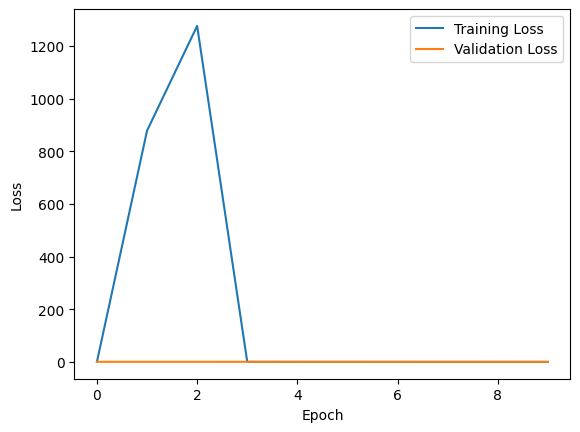

In [18]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()